
# Black Scholes Equation Solved Analytically

The Black Scholes Equation revolves around modeling and predicting the price of a European Call Option (in the standard case), and in general the pricing of a variety of exotic options given knowledge of the options payout at an expiry time $T$. The Black Scholes Equation, alongside the Binomial Pricing Method can be used to prive a general class of assets called *Derivative Securities*, which in general are any security whose price is a function of an underlying security $S$, which for our cases is a stock. 

The Black-Scholes Equation is derived by using no-arbitrage pricing, and constructing a riskless portfolio, which by the Fundamental Theorem of Arbitrage Pricing, must grow at the risk-free rate. This allows us to derive the Black Scholes Equation, which we will do so below.

# Derivation

Assume that $C$ the call-option price is a function of the stock price $S_{t}$ and the current time $t$, thus $C_{t}(S_{t},t)$ is the function of the call-option price.

Additionally, we assume that $S_{t}$, the underlying stock price undergo's Geometric Brownian Motion, i.e 


$$dS_{t} = \mu S_{t}dt + \sigma S_{t}dX$$


We can then apply Ito's Lemma to $C_{t}(S_{t},t)$ to get the following...


$$dC_{t} = \frac{\partial C}{\partial t} dt + \frac{\partial C}{\partial S}dS_{t} + \frac{1}{2}\frac{\partial^{2} C}{\partial S^{2}} dS_{t}^{2}$$

Notice though that we may plugin $dS_{t}^{2} = \sigma^{2}S_{t}^{2}dt$, and $dS_{t} = \mu S_{t}dt + \sigma S_{t}dX$ to get 


$$dC_{t} = \left(\frac{\partial C}{dt} + \mu S_{t} \frac{\partial C}{\partial S} + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2}\right)dt + \sigma \frac{\partial C}{\partial S} S_{t}dX $$


Now we construct a portfolio $\Pi_{t} = C_{t} + \Delta*S_{t}$, where $\Delta$ is a function of $t$ and $S_{t}$, but that it is locally constant, we want to construct a riskless portfolio, thus we want $d(\Pi_{t})$ to have no stochastic component, we will compute $d(\Pi)$, and then come to a conclusion as to what $\Delta$ must be in order to satisfy this constraint. Because $\Delta$ is locally constant, we have that 


$$d \Pi_{t} = d (C_{t} + \Delta*S_{t}) = dC_{t} + \Delta dS_{t}$$
$$= \left(\frac{\partial C}{dt} + \mu S_{t} \frac{\partial C}{\partial S} + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2}\right)dt + \sigma \frac{\partial C}{\partial S} S_{t}dX + \Delta \left( \mu S_{t} dt + \sigma S_{t} dX_{t} \right)$$
$$= \left(\frac{\partial C}{dt} + \mu S_{t} \frac{\partial C}{\partial S} + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} + \Delta \mu S_{t} \right)dt + \sigma S_{t} \left( \frac{\partial C}{\partial S} + \Delta \right) dX$$

Notice we want the $dX$ component to be $0$, so we must have that $\Delta = - \frac{\partial C}{\partial S}$, this is the infamous Delta-Hedging Formula. We then plug this into the above equation to get 

$$ d \Pi_{t} = \left(\frac{\partial C}{dt} + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} \right)dt$$ 


Notice since $\Pi$ changes without risk, we know that it will grow at the risk free rate, thus we may assume that  


$$d \Pi_{t} = r \Pi_{t} dt$$
$$\left(\frac{\partial C}{dt} + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} \right)dt = r \left(C_{t} + \Delta S_{t} \right)dt$$
$$\left(\frac{\partial C}{dt} + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} \right)dt = r \left(C_{t} - \frac{\partial C}{\partial S} S_{t} \right)dt$$
$$\frac{\partial C}{dt} + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} = rC_{t} - r\frac{\partial C}{\partial S} S_{t}$$
$$\frac{\partial C}{dt} + r\frac{\partial C}{\partial S} S + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} - rC_{t} = 0 $$
$$\frac{\partial C}{dt} +  \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} +  rS\frac{\partial C}{\partial S}  - rC = 0 $$


Notice thus that we have for a call option that 

$$C(S_{T},T) = (S_{T} - K)^{+} = \text{max}(S_{T} - K, 0)$$ 

Thus solving the Black-Scholes equation corresponds to solving the following Stochastic Partial Differential Equation given by 

$$\frac{\partial C}{dt} +  \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} +  rS\frac{\partial C}{\partial S}  - rC = 0 $$

with the boundary condition,

$$C(S_{T},T) = (S_{T} - K)^{+} = \text{max}(S_{T} - K, 0)$$

Thus, solving the Black-Scholes PDE gives us the value for the call option price at the current time, additionally, changing the boundary conditions allows us to consider different options, such as American Options, Asian Options, and other exotic options.

# Solving the Black-Scholes Stochastic PDE Analytically Using Python

Below we will provide some sample code which shows how to solve the Black-Scholes PDE Analytically, alongside some other methods of solving it using numerical methods.

In [17]:
%pip install py-pde 
%pip install h5py pandas pyfftw tqdm
%pip install numpy 
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

#for simulating brownian motion
import pandas as pd 
import seaborn as sns
import math
from scipy.stats import norm

# Simulate Brownian Motion

Below we will utilize the equation

$$W(t_{i+1}) = W(t_{i}) + \sqrt{t_{i + 1} - t_{i}} Z_{i + 1}$$

is a recurrence relation for the brownian motion, check [Glasserman, 2003] (Monte Carlo Methods for Financial Engineering by Paul Glasserman) for more details, and $Z_{i+1}$ is a normally distributed random variable. Also check the link (https://www.quantstart.com/articles/brownian-motion-simulation-with-python/) for more details about the derivation.

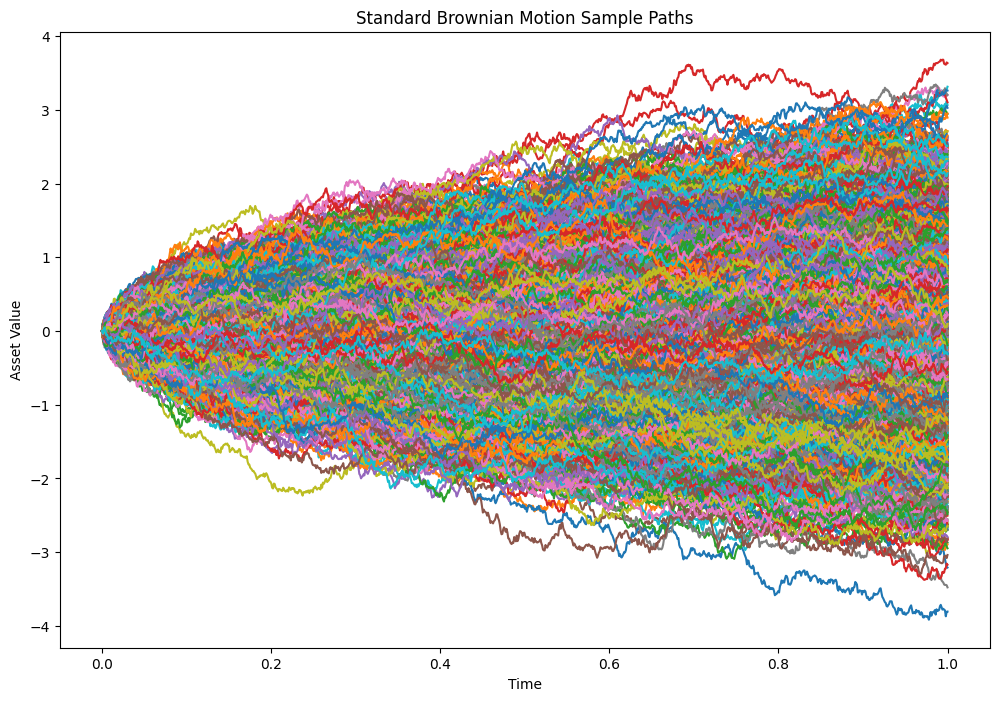

In [57]:
#plot brownian motion
sigma = 1.0                 #standard div
mu = 0.0                    #mean
S0 = 1.0                    #initial stock price
paths = 5000                #number of brownian motion paths

dt = 0.001                  #time step
T = 1.0                     #end time
n = int(T/ dt)              # number of steps
t = np.linspace(0,T,n)      # time step vector
W = np.zeros((paths,n))     # W Matrix, each row correponds to a brownian motion path
interval = [0.0,T]          # time interval 


#Create the random number generator
rng = np.random.default_rng(42)
#sample from the Normal distribution with mean 0 and standard deviation 1 
Z = rng.normal(mu, sigma, (paths, n))

for j in range(paths):
    for i in range(1, W.shape[1]):
        #Compute using the recurrence relation
        W[j][i] = W[j][i-1] + math.sqrt(t[i] - t[i-1])*Z[j][i]

#now let's plot the points
fig, ax = plt.subplots(1,1, figsize=(12,8))
for j in range(paths):
    ax.plot(t, W[j,:])
ax.set_title("Standard Brownian Motion Sample Paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()


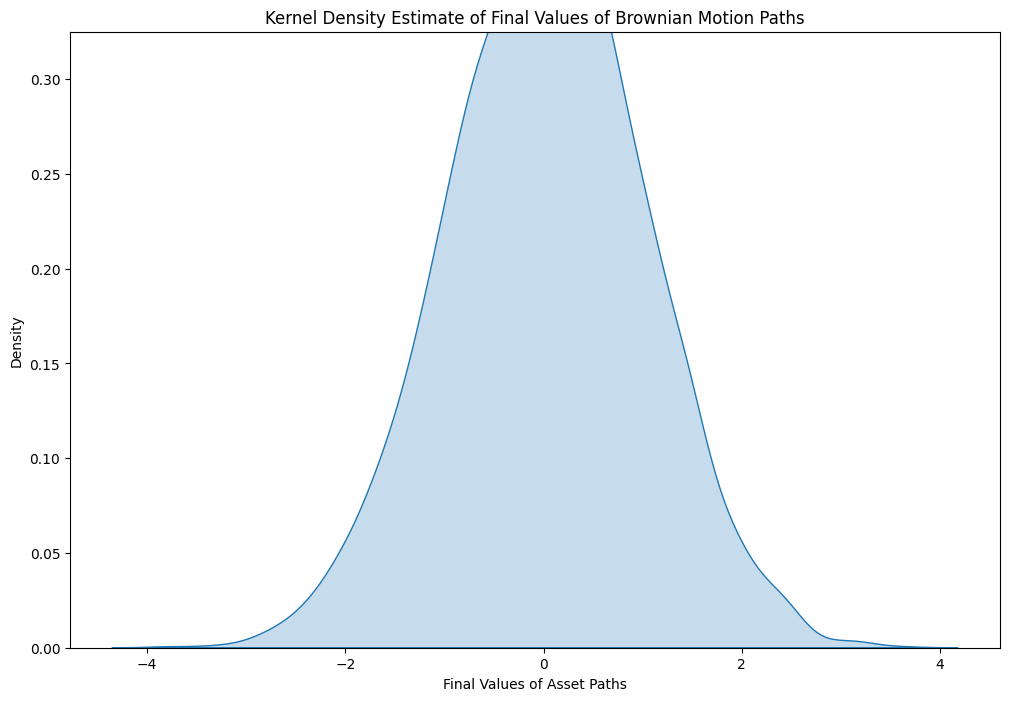

final_values    0.027777
dtype: float64 final_values    0.996783
dtype: float64


In [59]:
#we can also look at the distribution of the final values of the paths
final_values = pd.DataFrame({"final_values": W[:, -1]})
# now we will use Seaborn to estimate and plot the KDE distribution of the final values
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.kdeplot(data=final_values, x="final_values", fill=True, ax=ax)
ax.set_title("Kernel Density Estimate of Final Values of Brownian Motion Paths")
ax.set_ylim(0.0, 0.325)
ax.set_xlabel("Final Values of Asset Paths")
plt.show()

# notice that this is approximately normal, and we can improve this by adding more paths, and seeing this!
print(final_values.mean(),final_values.std())

## Constant Drift and Volatility Brownian Motion

Now consider a brownian motion with constant drift and volatility, then we have the recurrence relation 

$$X(t_{i+1}) = X(t_{i}) + \mu(t_{i+1} - t_{i}) + \sigma \sqrt{t_{i+1} - t_{i}}Z_{i+1}$$ 

Also, here's a link to a solution for Geometric Brownian Motion (https://www.quantstart.com/articles/Geometric-Brownian-Motion/)!

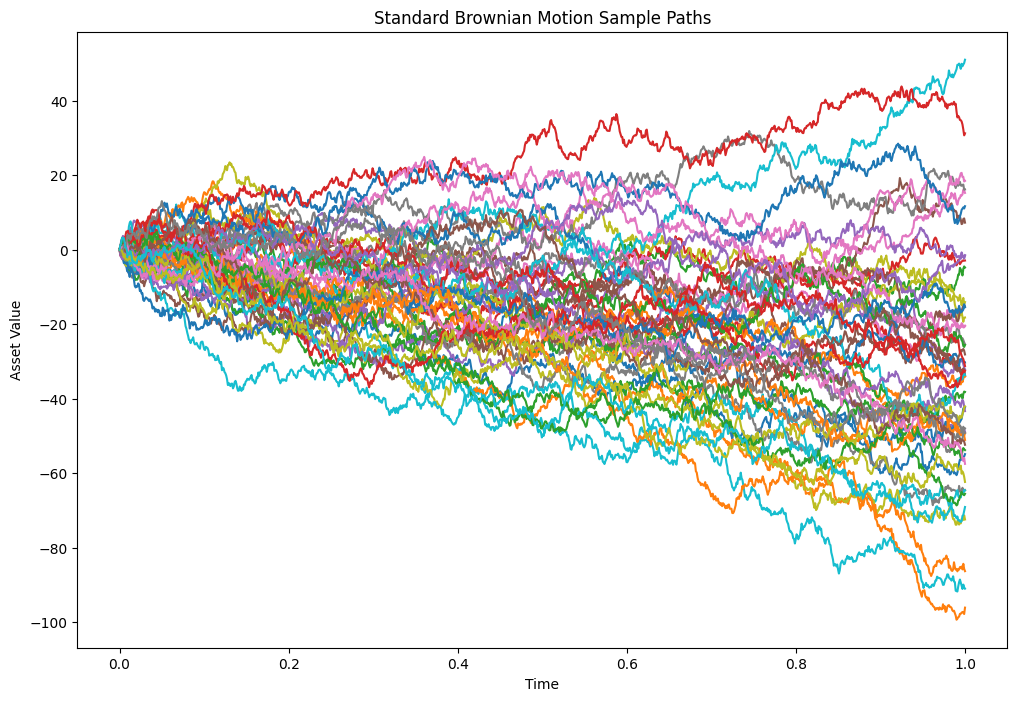

In [84]:
#plot brownian motion
sigma = 5.0                 #standard div
mu = -0.2                    #mean
paths = 50                  #number of brownian motion paths

points = 1000                                        #number of points along the path
X = np.zeros((paths,points))                         # W Matrix, each row correponds to a brownian motion path
interval = [0.0,T]                                   #time interval 
dt = (interval[1] - interval[0]) / (points - 1)
t = np.linspace(interval[0],interval[1],points)      # time step vector


#Create the random number generator
rng = np.random.default_rng(42)
#sample from the Normal distribution with mean 0 and standard deviation 1 
Z = rng.normal(mu, sigma, (paths, points))

for j in range(paths):
    for i in range(1, X.shape[1]):
        #Compute using the recurrence relation
        X[j][i] = X[j][i-1] + mu*(dt) +  sigma*math.sqrt(dt)*Z[j][i]

#now let's plot the points
fig, ax = plt.subplots(1,1, figsize=(12,8))
for j in range(paths):
    ax.plot(t, X[j,:])
ax.set_title("Standard Brownian Motion Sample Paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()

# Solving the Black-Scholes Equation

The Black-Scholes Equation given in the first section/ derivation has an analytical solution, which can be found through a change of coordinates to the heat equation. The solution is given by  

$$C(S_{t}, t) = S_{t}N(d_{1}) - Ke^{-r(T - t)}N(d_{2})$$

Where 

$$d_{1} = \frac{ln(\frac{S_{t}}{K}) + \left(r + \frac{\sigma^{2}}{2}\right)(T - t)}{\sigma \sqrt{T - t}}$$
$$d_{2} = \frac{ln(\frac{S_{t}}{K}) + \left(r - \frac{\sigma^{2}}{2}\right)(T - t)}{\sigma \sqrt{T - t}}$$

$$N(d) = \frac{1}{\sqrt{2\pi}} \int_{- \infty}^{d} e^{- \frac{y^{2}}{2}}dy$$

where $\sigma$ is the volatility, $r$ is the risk-free rate, and $K$ is the Strike-Price of the option, and $N(d)$ is the standard normal cumulative distribution function.

In [33]:
# first we will begin by defining the key constants which we will use for solving the Black-Scholes Equation/ setting up the system.
VOLATILITY = 0.38 
RISK_FREE_RATE = 0.0212
STRIKE_PRICE = 294
STOCK_PRICE = 245
TIME_TO_EXPIRY = 101/365

def calc_d1(S, K, r, vol, T, t):
    num = math.log(float(S)/float(K)) + (r + (vol)**2/2)*(T - t)
    denom = vol*math.sqrt(T - t)
    return (num/denom) 

def calc_d2(S,K,r,vol,T,t):
    num = math.log(float(S)/float(K)) + (r - (vol)**2/2)*(T - t)
    denom = vol*math.sqrt(T-t)
    return (num/denom)

def blackScholesOptionPrice(S, K, r, vol, T, t):
    d1, d2 = calc_d1(S, K, r, vol, T, t), calc_d2(S, K, r, vol, T, t)
    return S*norm.cdf(d1) - K*math.exp(-r*(T-t))*norm.cdf(d2)

print(blackScholesOptionPrice(STOCK_PRICE, STRIKE_PRICE, RISK_FREE_RATE, VOLATILITY, TIME_TO_EXPIRY, 0))

5.527304771683909


Now we can see that we priced the European Call Option correctly as shown above! Notice that we can check this with the examples in the following resource (https://digitalcommons.liu.edu/cgi/viewcontent.cgi?article=1074&context=post_honors_theses). This is great, but we need to know how to price non-european options, so we need a more general method of solving the SDE, which we will do in the next section (using PDE solvers, numerically!) Before we do that, we will visualize the solution above!

## Geometric Brownian Motion Simulation to Numerically Solve Black-Scholes

Notice that to solve Black-Scholes numerically, we must first simulate geometric brownian motion, which is motion undergoing the SDE

$$dS_{t} = \mu S_{t} dt + \sigma S_{t} dX_{t}$$
$$\frac{dS_{t}}{S_{t}} = \mu dt + \sigma dX_{t}$$

Notice the LHS looks like $\log{S_{t}}$ which motivates us to use Ito's lemma on $\log{S_{t}}$, which gives us....

$$d \log{S_{t}} = \frac{\partial \log{S_{t}}}{\partial t}dt + \frac{\partial \log{S_{t}}}{\partial S_{t}} dS_{t} + \frac{1}{2}\frac{\partial^{2} \log{S_{t}}}{\partial S_{t}^{2}} dS_{t}^{2}$$

$$d \log{S_{t}} = \frac{\partial \log{S_{t}}}{\partial S_{t}} (\mu S_{t} dt + \sigma S_{t} dX_{t}) + \frac{1}{2} \frac{\partial^{2} \log{S_{t}}}{\partial S_{t}^{2}} \sigma^{2} S_{t}^{2} dt$$

$$d \log{S_{t}} = \frac{1}{S} (\mu S_{t} dt + \sigma S_{t} dX_{t}) - \frac{1}{2} \frac{1}{S^{2}} \sigma^{2} S_{t}^{2} dt$$

$$d \log{S_{t}} = \frac{1}{S} (\mu S_{t} dt + \sigma S_{t} dX_{t}) - \frac{1}{2} \frac{1}{S^{2}} \sigma^{2} S_{t}^{2} dt$$

$$d \log{S_{t}} = \left( \mu - \frac{\sigma^{2}}{2} \right) dt + \sigma dX_{t}$$

We can solve this SDE through integrating w.r.t t on both sides to get 

$$ \log{S_{t}} - \log{S_{0}} =  \left( \mu - \frac{\sigma^{2}}{2} \right) t + \sigma X_{t}$$

$$S_{t} = S_{0} \exp{\left( \left( \mu - \frac{\sigma^{2}}{2} \right) t + \sigma X_{t} \right)}$$

Thus we can simulate this geometric brownian motion by simulating some regular brownian motion $X_{t}$, and then plugging it into the formula above.

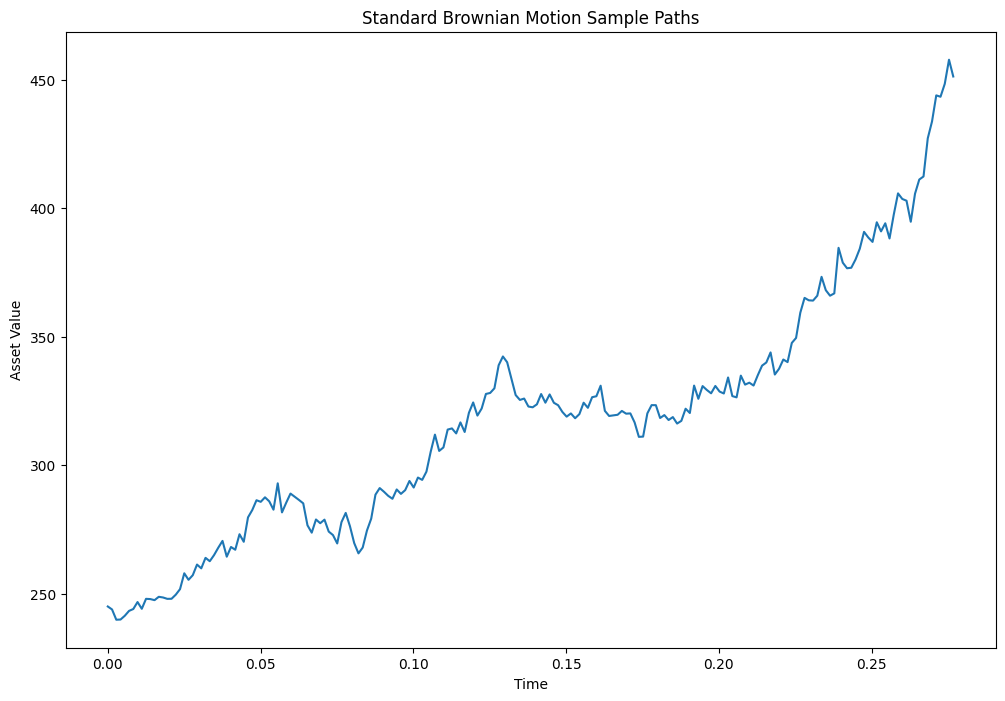

Text(0, 0.5, 'Asset Value')

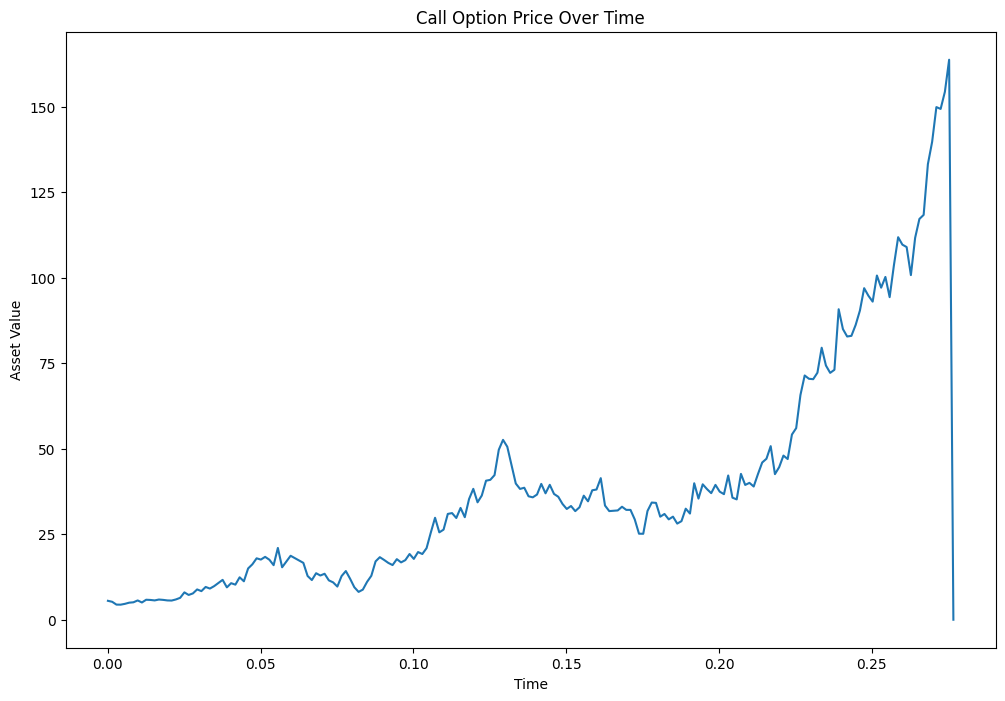

In [47]:
def brownian_motion_path(sigma: float, mu: float, paths: int, points: int, T: float):
    #plot brownian motion
                                                         #number of points along the path
    X = np.zeros((paths,points))                         # W Matrix, each row correponds to a brownian motion path
    interval = [0.0,T]                                   #time interval 
    dt = (interval[1] - interval[0]) / (points - 1)
    t = np.linspace(interval[0],interval[1],points)      # time step vector


    #Create the random number generator
    rng = np.random.default_rng()
    #sample from the Normal distribution with mean 0 and standard deviation 1 
    Z = rng.normal(mu, sigma, (paths, points))

    for j in range(paths):
        for i in range(1, X.shape[1]):
            #Compute using the recurrence relation
            X[j][i] = X[j][i-1] + mu*(dt) +  sigma*math.sqrt(dt)*Z[j][i]
    return X

# Let's define some constants
mu = 0.0
sigma = 0.38
points = 200

T = np.linspace(0, TIME_TO_EXPIRY, points)
W = brownian_motion_path(1.0, 0.1,1,200,101/365)[0,:]
S = np.zeros((T.shape[0],))
C = np.zeros((T.shape[0],))

for i in range(S.shape[0]):
    S[i] = STOCK_PRICE*math.exp((mu - (sigma**2)*(1/2))*T[i] + sigma*W[i])

#now let's plot the points
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(T, S[:])
ax.set_title("Standard Brownian Motion Sample Paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()

# Need to fix this so that it will bounce back (the stock price must always be positive, which is why we are getting into errors)
# we need to simulate a bounded geometric brownian motion
for i in range(C.shape[0]-1):
    C[i] = blackScholesOptionPrice(S[i], STRIKE_PRICE, RISK_FREE_RATE, VOLATILITY, TIME_TO_EXPIRY, T[i])

#now let's plot the points
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(T, C[:])
ax.set_title("Call Option Price Over Time")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")

# Getting Pricing Data for Estimating Historical Volatility using Polygon.io 

Here is the link/ tutorial we are using (https://github.com/polygon-io/client-python), which is a python implementation of the Polygon API, which we can find here: https://polygon.io/docs. For calculation of volatility, i.e. historical volatility, check out the following article (https://medium.com/@polanitzer/volatility-calculation-in-python-estimate-the-annualized-volatility-of-historical-stock-prices-db937366a54d).

In [ ]:
%pip install -U polygon-api-client

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 44 kB 2.8 MB/s eta 0:00:011
     |████████████████████████████████| 128 kB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 159 kB 35.5 MB/s eta 0:00:01
     |████████████████████████████████| 160 kB 25.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


We use the equation 

$$\text{vol} = \sigma * \sqrt{T}$$

where $\sigma$ is the standard deviation of the log daily returns and T is the number of trading dates (so for calculating daily volatility, we will use the number of trading days in a year for annualized daily volatility). For unannualized volaility, we merely calculate $\sigma$. which is the standard derviation of the log daily (or other) returns. 


Here's another resource (https://faculty.ksu.edu.sa/sites/default/files/options_futures_and_other_derivatives_8th_ed_part1.pdf) look at page 303/304. Same as this but with more info (http://lib.ysu.am/disciplines_bk/2b66030e0dd4c77b2bda437f6c1e5e66.pdf).

In [103]:
from polygon import RESTClient
import pandas as pd
import datetime
client = RESTClient(api_key="bYx0g7_YgYXQsq1msFy5zo8KmEAXpc1y")

In [ ]:
ticker = "TSLA"
aggs = []
for a in client.list_aggs(ticker=ticker, multiplier=1, timespan="day", from_="2023-01-01", to="2024-01-01", limit=50000):
    aggs.append(a)

# Dataframe containing all the stock information/ prices from 2023-01-01 to 2023-06-13
df = pd.DataFrame(aggs)

# here we only select the relevant columns and drop all other unnecessary information
df = df[["close","timestamp"]]
df = df.dropna()

#here we transform the timestamp to a datetime
df["date"] = df["timestamp"].apply(lambda x: datetime.datetime.fromtimestamp(x / 1000))
df = df[["close", "date"]]
df.set_index("date")
df.loc[1:, "Price Relative"] = df["close"].iloc[1:] / df["close"].shift(1).iloc[1:]  #calculates S_{t} / S_{t-1} for each row t
# the above is also the same as the line below
# df["price Relative"] = df["close"].iloc[1:] / df["close"].shift(1).iloc[1:]
df.loc[1:,"Daily Log Return"] = np.log(df.loc[1:,"Price Relative"])

DailyVolatility = df.loc[1:,"Daily Log Return"].std()
print("The daily volatility of TSLA is {:.2%}".format(DailyVolatility))
print("The annualized daily volatility measured in trading days is {:.2%}".format(DailyVolatility*math.sqrt(252)))
# now let's estimate the black Scholes pricing information
df

The daily volatility of TSLA is 3.05%
The annualized daily volatility measured in trading days is 48.37%


,close,date,Price Relative,Daily Log Return
0,217.61,2023-06-05,NaN,NaN
1,221.31,2023-06-06,1.017003,0.016860
2,224.57,2023-06-07,1.014730,0.014623
3,234.86,2023-06-08,1.045821,0.044802
4,244.40,2023-06-09,1.040620,0.039817
...,...,...,...,...
140,252.54,2023-12-22,0.992299,-0.007731
141,256.61,2023-12-26,1.016116,0.015988
142,261.44,2023-12-27,1.018822,0.018647
143,253.18,2023-12-28,0.968406,-0.032104


# Implied Volatility Surface Plotting

Here we will use the current option price in order to create a implied volatility surface in python, which we will use for plotting, which we can use for getting and making some really cool visualizations, which traders can use for their own information.

In [111]:
%pip install yfinance
import yfinance as yf
import datetime as dt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
def options_chains(ticker):
    asset = yf.Ticker(ticker) 
    expirations = asset.options 
    chains = pd.DataFrame()     #tuple of strings of dates i.e ("2025-06-20", ..., "2025-07-03")
    for expiration in expirations:
        # tuple of two dataframes
        opt = asset.option_chain(expiration)    #what is an option chain object?? (https://www.investopedia.com/terms/o/optionchain.asp)
        calls = opt.calls
        calls['optionType'] = "call"
        puts = opt.puts
        puts['optionType'] = "put"

        chain = pd.concat([calls, puts])
        chain["expiration"] = pd.to_datetime(expiration) + pd.DateOffset(hours=23,minutes=59,seconds=59)   #sets the expiration to the next day
        chains = pd.concat([chains, chain])
    chains["daysToExpiration"] = (chains.expiration - dt.datetime.today()).dt.days + 1  #calculates days till expiration 
    return chains

chains = options_chains("TSLA")
chains

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expiration,daysToExpiration
0,TSLA250606C00050000,2025-06-04 19:17:46+00:00,50.0,284.10,281.40,283.25,-20.199982,-6.638180,2.0,0,10.734378,True,REGULAR,USD,call,2025-06-06 23:59:59,3
1,TSLA250606C00055000,2025-06-03 14:53:43+00:00,55.0,294.05,276.40,278.25,0.000000,0.000000,4.0,0,10.187504,True,REGULAR,USD,call,2025-06-06 23:59:59,3
2,TSLA250606C00060000,2025-06-03 14:53:43+00:00,60.0,288.93,271.45,273.20,0.000000,0.000000,8.0,2,9.695316,True,REGULAR,USD,call,2025-06-06 23:59:59,3
3,TSLA250606C00065000,2025-06-03 14:53:43+00:00,65.0,283.82,266.50,268.20,0.000000,0.000000,4.0,6,9.351567,True,REGULAR,USD,call,2025-06-06 23:59:59,3
4,TSLA250606C00070000,2025-05-29 19:57:49+00:00,70.0,288.72,261.45,263.20,0.000000,0.000000,5.0,4,8.835942,True,REGULAR,USD,call,2025-06-06 23:59:59,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,TSLA271217P00650000,2025-05-30 15:39:38+00:00,650.0,332.35,345.25,351.20,0.000000,0.000000,18.0,9,0.468710,True,REGULAR,USD,put,2027-12-17 23:59:59,927
84,TSLA271217P00660000,2025-06-02 13:38:06+00:00,660.0,347.63,353.85,357.95,0.000000,0.000000,2.0,0,0.456205,True,REGULAR,USD,put,2027-12-17 23:59:59,927
85,TSLA271217P00670000,2025-05-29 17:12:41+00:00,670.0,348.01,362.50,366.60,0.000000,0.000000,4.0,3,0.453863,True,REGULAR,USD,put,2027-12-17 23:59:59,927
86,TSLA271217P00690000,2025-06-04 14:37:03+00:00,690.0,384.37,382.00,385.35,4.290008,1.128712,1.0,0,0.456884,True,REGULAR,USD,put,2027-12-17 23:59:59,927


In [ ]:
# we will use Gaussian Process Regression to interpollate between the missing data points